In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer

In [2]:
# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Display the shape of the data
data.shape

(768, 9)

In [4]:
# Describe the data values (Gives a better idea of outliers and incorrect entries)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Clean the data

# Glucose: Replace '0' values with NaN
data['Glucose'] = data['Glucose'].apply(lambda x: pd.NA if x == 0 else x)

# BloodPressure: Replace values below 40 mm Hg with NaN
data['BloodPressure'] = data['BloodPressure'].apply(lambda x: pd.NA if x < 40 else x)

# SkinThickness: Replace values below 10 mm with NaN
data['SkinThickness'] = data['SkinThickness'].apply(lambda x: pd.NA if x < 10 else x)

# Insulin: Replace values above 400 µU/mL with NaN
data['Insulin'] = data['Insulin'].apply(lambda x: pd.NA if x > 400 else x)

# BMI: Replace '0' values with NaN
data['BMI'] = data['BMI'].apply(lambda x: pd.NA if x == 0 else x)

In [7]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                39
SkinThickness               231
Insulin                      20
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

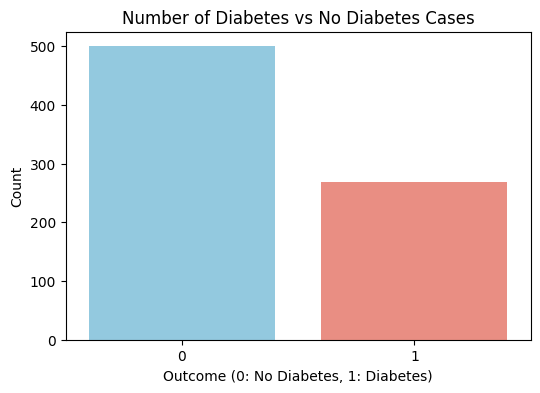

In [8]:
# Plot a bar graph for the number of cases in each class (Diabetes vs No Diabetes)

# Set up the plot
plt.figure(figsize=(6, 4))

# Count the number of occurrences for each class (Outcome)
class_counts = data['Outcome'].value_counts()

sns.barplot(x=class_counts.index, y=class_counts.values, palette={0:'skyblue', 1:'salmon'}, hue=class_counts.index, legend=False)
plt.title('Number of Diabetes vs No Diabetes Cases')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

# Mean Imputation

In [9]:
# Perform mean imputation

# Create a copy of the original data
data_mi = data.copy()

# Fill missing values with the mean of each column
with pd.option_context("future.no_silent_downcasting", True):
    data_mi.fillna(data_mi.mean(), inplace=True)

data_mi.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

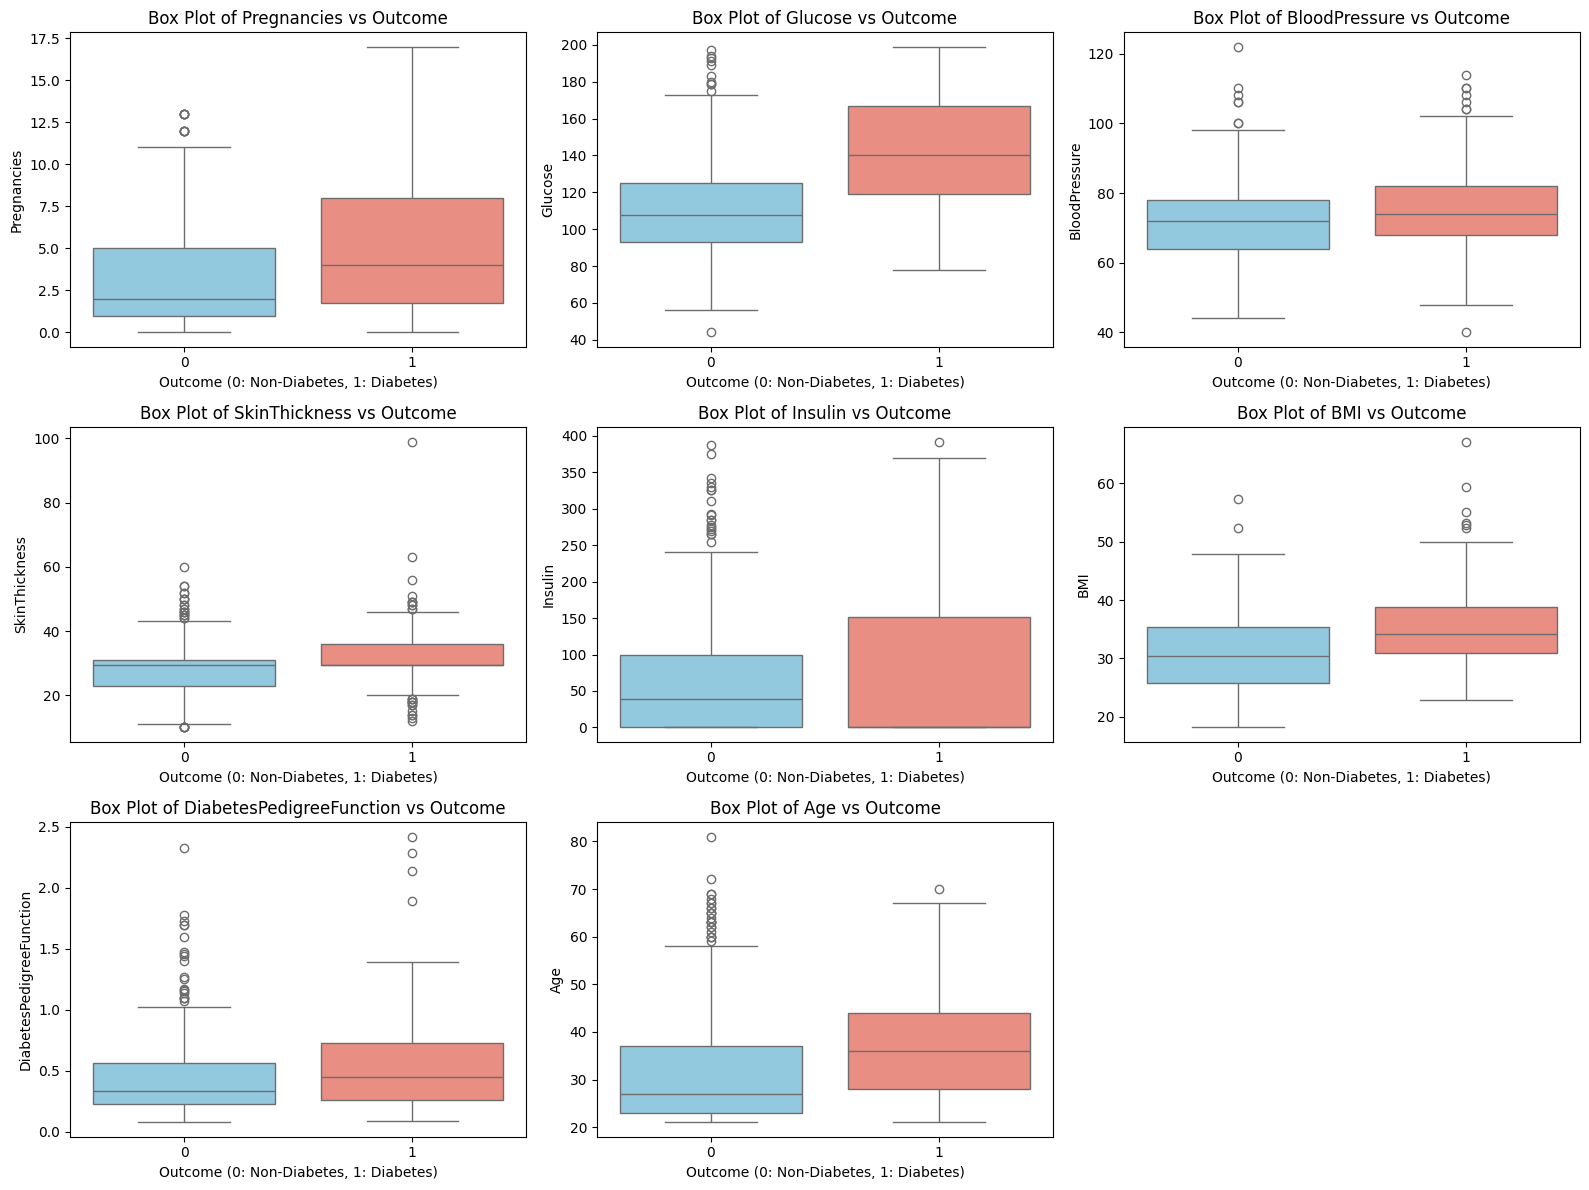

In [10]:
# Box plot visualization

# Set up the plot
plt.figure(figsize=(16, 12))

# Iterate through each feature and create box plots based on 'Outcome'
for i, column in enumerate(data_mi.columns[:-1], 1):  # Exclude the 'Outcome' column
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=data_mi, palette={0:'skyblue', 1:'salmon'}, hue='Outcome', legend=False)
    plt.title(f'Box Plot of {column} vs Outcome')
    plt.xlabel('Outcome (0: Non-Diabetes, 1: Diabetes)')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

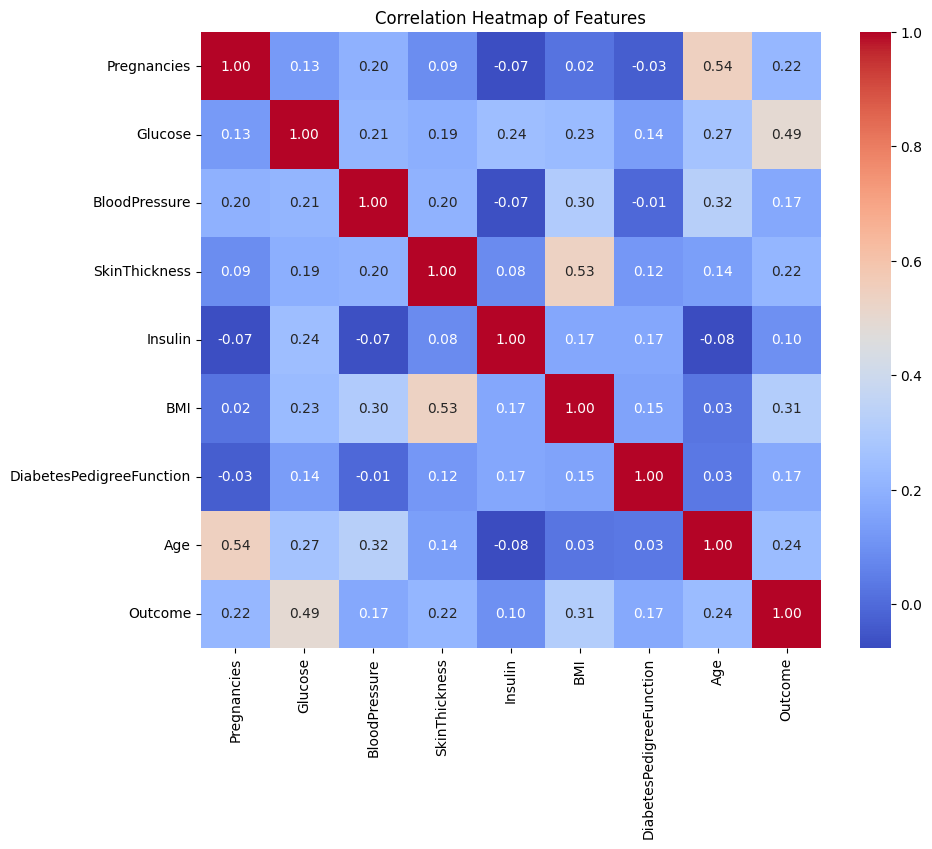

In [11]:
# Correlation heatmap visualization

# Set up the plot
plt.figure(figsize=(10, 8))
correlation_matrix = data_mi.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# K Nearest Neighbour (KNN) Imputation

In [12]:
# Perform knn imputation

# Create a copy of the original data
data_knni = data.copy()

# Replace pd.NA with np.nan for compatibility with KNNImputer
with pd.option_context("future.no_silent_downcasting", True):
    data_knni.replace(pd.NA, np.nan, inplace=True)

# Proceed with KNN Imputation
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer and transform the data
data_knni_fitted = imputer.fit_transform(data_knni)

# Convert the imputed result back to a DataFrame
data_knni = pd.DataFrame(data_knni_fitted, columns=data.columns)

data_knni.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

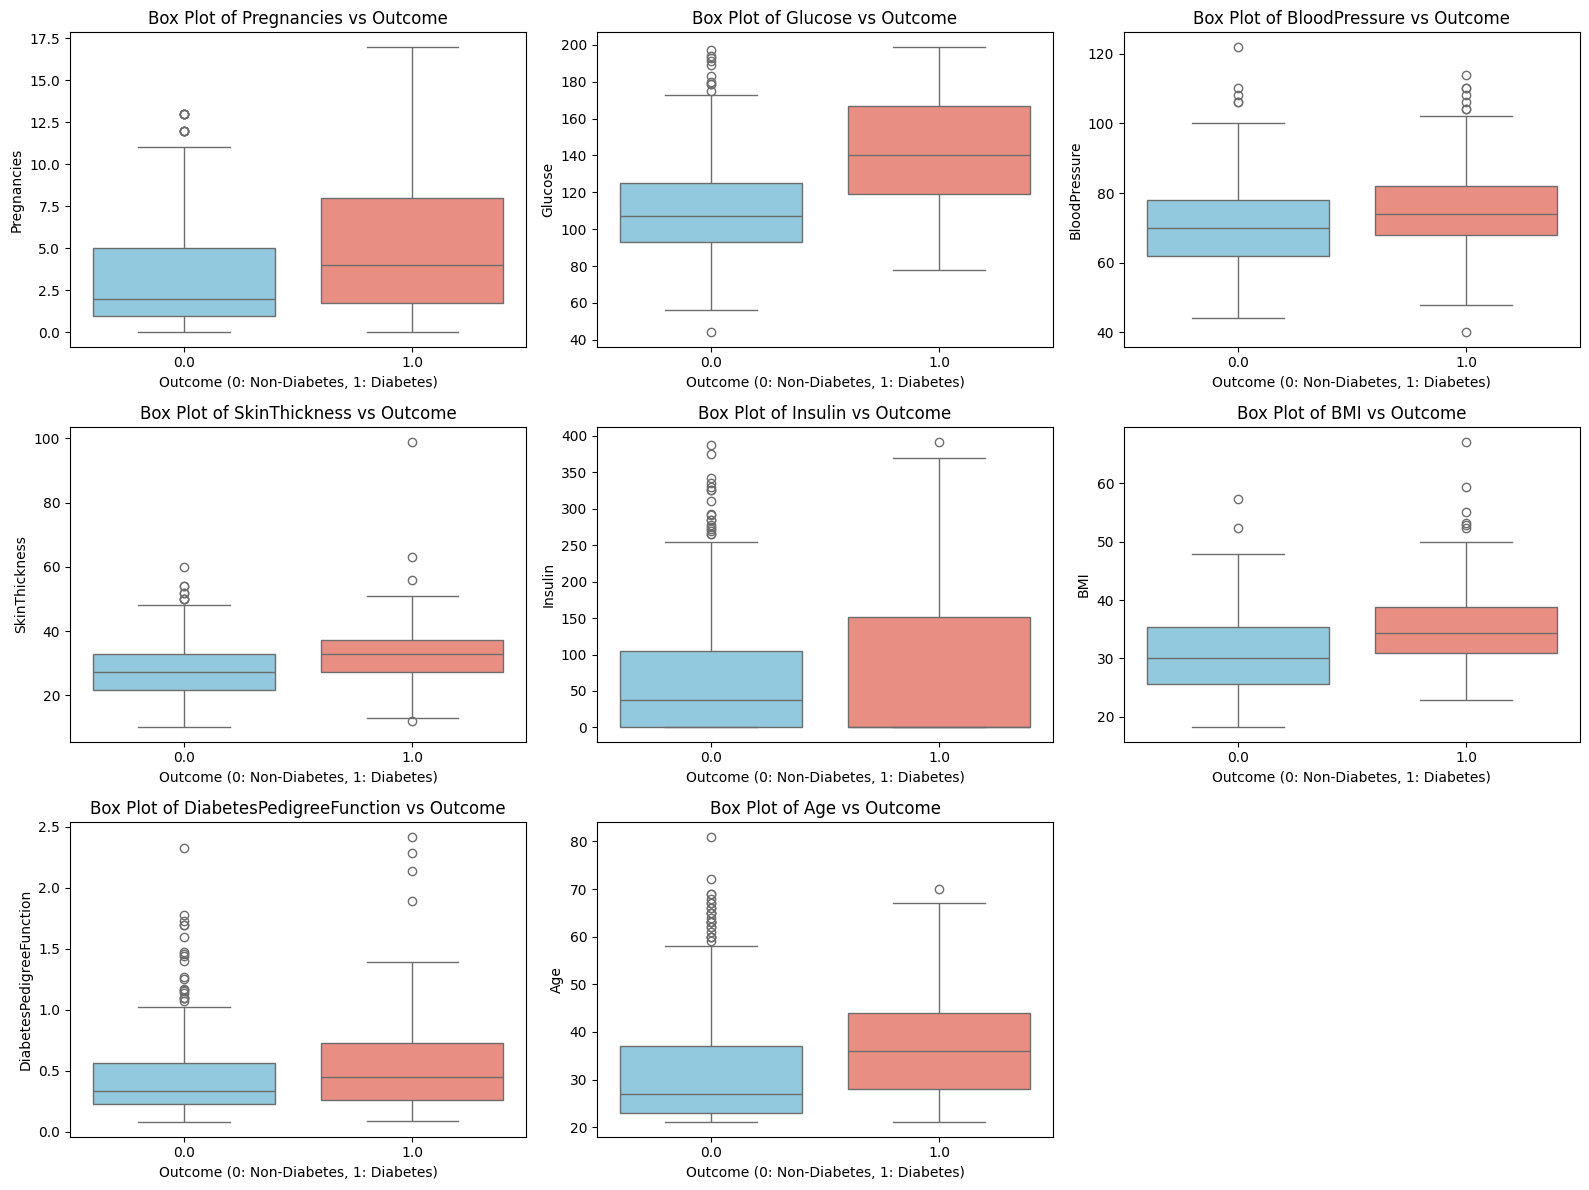

In [13]:
# Box plot visualization

# Set up the plot
plt.figure(figsize=(16, 12))

# Iterate through each feature and create box plots based on 'Outcome'
for i, column in enumerate(data_knni.columns[:-1], 1):  # Exclude the 'Outcome' column
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=data_knni, palette={0:'skyblue', 1:'salmon'}, hue='Outcome', legend=False)
    plt.title(f'Box Plot of {column} vs Outcome')
    plt.xlabel('Outcome (0: Non-Diabetes, 1: Diabetes)')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

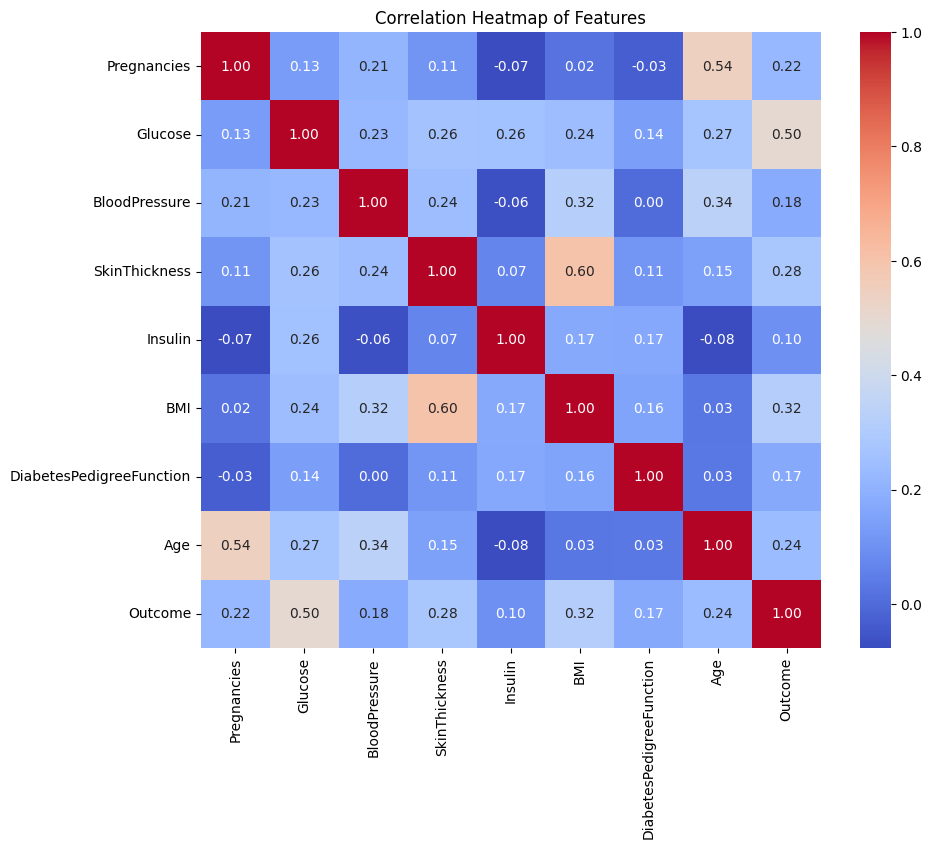

In [14]:
# Correlation heatmap visualization

# Set up the plot
plt.figure(figsize=(10, 8))
correlation_matrix = data_knni.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()